# 1. Introduction
 #### 1.1 Scenario
I am a junior data analyst working in the marketing analyst team at Bellabeat. Urška Sršen, co-founder and Chief Creative Officer of Bellabeat, believes that analyzing smart device fitness data could help unlock new growth opportunities for the company. I am tasked to work on one of Bellabeat’s products and analyze smart device data to gain insight into how consumers are using their smart devices. The insights I discover will then help guide marketing strategy for the company. In this case study, I will present my analysis to the Bellabeat executive team along with my high-level recommendations for Bellabeat’s marketing strategy.

#### 1.3 Bellabeat's Products
 The company’s wearable products include:

1. Time – A wellness watch that seamlessly merges the classic appearance of a traditional timepiece with smart technology. It monitors user activity, sleep, and stress levels. By connecting to the Bellabeat app, Time offers valuable insights into your daily wellness journey.

2. Leaf – Bellabeat's versatile wellness tracker, can be worn as a bracelet, necklace, or clip, adapting to your personal style. The Leaf tracker conveniently connects to the Bellabeat app, allowing you to effortlessly monitor your activity, sleep patterns, and stress levels.

3. Spring – A smart water bottle that tracks your daily water intake and connects to the Bellabeat app for easy monitoring of hydration levels.

4. All of Bellabeat's wearable devices synchronize with the **Bellabeat app**, allowing users to conveniently access their metrics. The wearables effectively monitor various aspects such as activity, including steps taken, distance traveled, calories burned, and activity minutes. Additionally, they track sleep patterns. Through the app, users can also conveniently track their menstrual cycle, hydration (excluding Spring), and meditation practices.

In addition, Bellabeat provides a Wellness Coach app that comes with a Bellabeat+ membership, granting users unlimited access to a vast library of educational videos, written articles, and audio content across a wide range of topics. These areas of focus include beauty, fitness, mindfulness, women's health, and more. The Wellness Coach app serves as a valuable resource for members, empowering them with comprehensive knowledge and guidance to enhance various aspects of their well-being.

# 2 Ask Phase

#### 2.1 Business Task

Through an in-depth analysis of Fitbit Fitness Tracker Data, Bellabeat aims to extract valuable insights regarding the usage patterns of smart devices. By leveraging this information, Bellabeat intends to enhance its understanding of customer preferences, optimize its product and service offerings, devise targeted marketing campaigns, and leverage emerging trends to drive consistent business growth.

This data analysis project aims to address three key questions:

What are the notable trends observed in the usage of smart devices?

How can these trends be applied to Bellabeat's customer base?

In what ways can these trends influence and shape Bellabeat's marketing strategy?

#### 2.2 Stakeholders 
 1. Urška Sršen – Bellabeat’s cofounder and Chief Creative Officer
 2. Sando Mur – Mathematician and Bellabeat’s cofounder
 3. Bellabeat’s marketing analytics team – a team of data analysts

# 3. Prepare Phase  
#### 3.1 Data used for project
The data source used for this case study is FitBit Fitness Tracker Data. This dataset was downloaded from Kaggle where it was uploaded by Möbius.

#### 3.2 Data Summary 

This particular dataset was compiled through a distributed survey conducted via Amazon Mechanical Turk between 03.12.2016 and 05.12.2016. It includes data provided by 33 Fitbit users who voluntarily participated in the survey and consented to sharing their personal tracker data. The dataset encompasses minute-level information on physical activity, heart rate, and sleep monitoring.

Furthermore, the variation observed in the dataset output can be attributed to the usage of diverse Fitbit tracker models as well as individual differences in tracking behaviors and preferences.

# 4. Process Phase 
 #### Key tasks: Data cleaning & manipulation of the data.

#### 4.1  Datasets for Case Study

For this case study I focused on using these datasets:

1. dailyActivity
2. sleep_day_merged
3. hourly_activity

However I combined hourlyCalorie_merged,hourlyIntensity_merged,hourlySteps_merged into one excel sheet via Power Query as one, naming it hourly_activity.

#### 4.2 Cleaning and manipulation before analysis

For this case study I used excel to initially to clean and organize the datasets. The used SQL on BigQuery for analysis. Cleaning the data consisted of:

1. checking for distinct number of participants by sort and filtering.
2. sort and filtered the date range of a month long period.
3. checked for duplicates - deleting any that werre found on each dataset. (only three were reported in the sleep_day_merged dataset.
4. formatted the date to short date format as mm/dd/yyyy.
5. formatted numerical data to be a number and uniform with 0 or 2 deimacl places. 
6. deleted the TrackerDistance column since it was the same as the TotalDistance column in rhe dailyAcivity dataset.
7. Added a column showing the day of the week on each dataset using the TEXT function.

# 5. Analysis Phase & Share Phase 
### SQL Dataset Uploaded
 Uploaded the clean datasets into BigQuery and began initial analysis.
 (Note: data visualizations of analysis is combined with results given)

#### 5.1 User Verification
Checked the amount of users by counting the distinct Ids in each dataset.

In [ ]:
SELECT COUNT(DISTINCT id) AS Total_ids
FROM `bellabeat-case-study-389920.fitbit_tracker_data.dailyActivity`

I ran the same SQL query above for each of the datasets and recieced these results. 

* dailyactivity - 33
* hourly_activity = 33
* sleep_day_merged - 24

#### 5.2 User Insights on their Fitbit usage
Conducted analysis on how many times each user wore their Fitbit Tracker:

Next, I conducted a breakdown of the users based on their level of usage for the FitBit Fitness device. For this analysis, I categorized the users into three distinct user types and how many times they logged their usage within the 31 day period.

* Active User - wore their tracker for 25-31 days
* Moderate User - wore their tracker for 15-24 days
* Light User - wore teir tracker for 0-14 days

In [ ]:
SELECT Id,
COUNT(Id) AS total_logged_used,
CASE
  WHEN COUNT(Id) BETWEEN 25 AND 31 THEN 'Active User'
  WHEN COUNT(Id) BETWEEN 15 AND 24 THEN 'Moderate User'
  WHEN COUNT(Id) BETWEEN 0 and 14 THEN 'Light User'
END Fitbit_Usage_Type
FROM `bellabeat-case-study-389920.fitbit_tracker_data.dailyActivity`
GROUP BY Id

[View Results Here](https://docs.google.com/spreadsheets/d/1RgA8vWBeJ3mV3LzOvCCfhuP9GjTdHLDW49iqEaHyUwc/edit?usp=sharing)

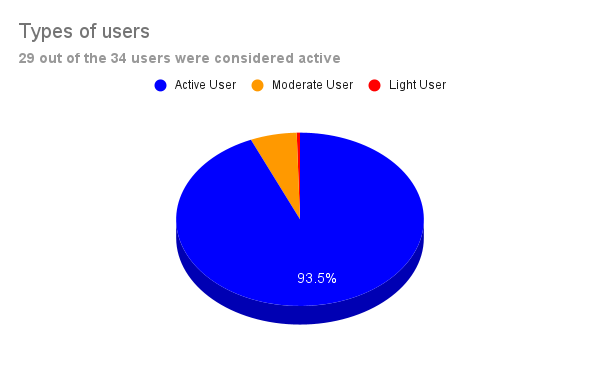

#### 5.3 User Data Activites 
Next, I wanted to analyze the daily_activity dataset and look for AVG of the steps, calories and distance.

In [ ]:
-- Tracking the avg in steps, distance, calories --
SELECT id,
 AVG(TotalSteps) AS average_steps,
 AVG(TotalDistance) AS average_distance,
 AVG(Calories) AS average_calories
FROM `bellabeat-case-study-389920.fitbit_tracker_data.dailyActivity`
GROUP BY Id

[View Results Here](https://docs.google.com/spreadsheets/d/1aeNPbUYr-yPaUq2QKKpWYtNnjFsYBUvX6ZCixLEX8Bk/edit?usp=sharing)


Next, I wanted to analyze the daily_activity dataset and look for the MIN, MAX, of the steps, calories and distance.

In [ ]:
-- Tracking the MIN & MAX in steps, distance, calories --
SELECT Id,
    MIN(TotalSteps) as min_total_steps,
    MAX(TotalSteps) as max_total_steps,
    MIN(Calories) as Min_calories_burned,
    MAX(Calories) as Max_calories_burned,
    MIN(TotalDistance) as min_distance,
    MAX(TotalDistance) as max_distance
FROM `bellabeat-case-study-389920.fitbit_tracker_data.dailyActivity`
GROUP BY Id

[View Results Here](https://docs.google.com/spreadsheets/d/1IGRy5Vwp-fJTKBVEveR3z8pOzGr7yew7wo5ejFRDSYk/edit?usp=sharing)

#### 5.4 Examining which day users are most active during the day of the week
I wanted to analzye which day users burned the most amount of calories and see how many steps were taken on a day-day basis. Analysis was conducted on 


In [ ]:
SELECT  
    DISTINCT Dayofweek,
    ROUND(AVG(TotalSteps), 2) as Average_total_steps,
    ROUND(AVG(TotalDistance), 2) as Average_total_distance,
    ROUND(AVG(Calories), 2) as Average_total_calories
 FROM `bellabeat-case-study-389920.fitbit_tracker_data.dailyActivity` 
 GROUP BY Dayofweek
 ORDER BY Average_total_steps DESC


[View Results Here](https://docs.google.com/spreadsheets/d/1_BCVo3Sa_FaAEyRM24HFiqZC-4OMmyozdrCtF_NCXwA/edit?usp=sharing)

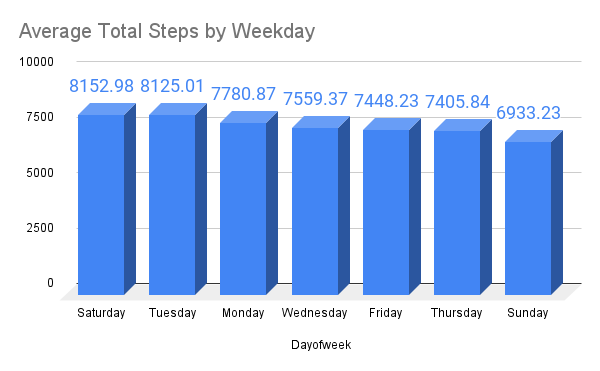

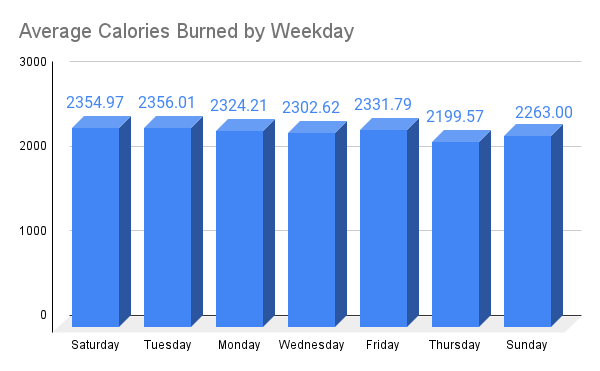

Based on the findings, the analysis reveals that Saturday stands out as the day with the highest user activity in terms of walking, closely followed by Tuesday. Moreover, both Saturday and Tuesday exhibit the highest average calorie expenditure among users. In contrast, Sunday appears to be the least active day for users in terms of walking, as it registers lower levels of average activity.

Next, I wanted to gain insight on the amount of activity conducted throughout the days of the week in each category of active minutes.

In [ ]:
-- Calculate the average minutes of each activity by week day --
SELECT Dayofweek,
    ROUND(AVG(VeryActiveMinutes), 2) AS Avg_active_minutes,
    ROUND(AVG(FairlyActiveMinutes), 2) AS Avg_fairly_minutes,
    ROUND(AVG(LightlyActiveMinutes)/60, 2) AS Avg_lightly_active_hours,
    ROUND(AVG(SedentaryMinutes)/60, 2) AS Avg_sedentary_hours
FROM `bellabeat-case-study-389920.fitbit_tracker_data.dailyActivity`
GROUP BY Dayofweek

[View Results Here](https://docs.google.com/spreadsheets/d/1x9jjQPTo24cWRjw1llbjdJR_NDIxOTVrk2xpFy3Tdtk/edit?usp=sharing)

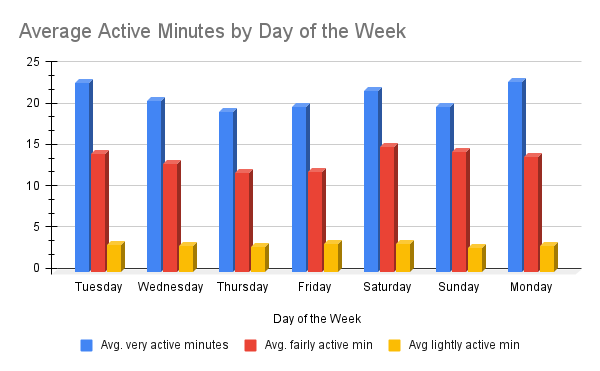

#### 5.5 CDC activity recommendations analysis

After collecting general user data, I conducted a preliminary analysis of overall activity levels and compared them to the recommended activity guidelines to determine if the use of a Fitbit is associated with higher activity levels.

Referring to the recommended weekly exercise guidelines provided by the CDC, which suggest 150 minutes of moderate activity for adults, it is evident that our average activity falls short of meeting this recommendation. This holds true whether we sort the data by weekday or calculate the total activity for each user. However, exploration on individual user data and evaluation onk
k
 ]cbenr0rdtheir activity levels if we include all forms of exercise except for a specific category.

In [ ]:
SELECT Id, 
avg(VeryActiveMinutes) + avg(FairlyActiveMinutes) + avg(LightlyActiveMinutes) AS Total_Avg_Active_Minutes,
CASE 
WHEN avg(VeryActiveMinutes) + avg(FairlyActiveMinutes) + avg(LightlyActiveMinutes) >= 150 THEN 'Meets CDC Recommendation'
WHEN avg(VeryActiveMinutes) + avg(FairlyActiveMinutes) + avg(LightlyActiveMinutes) <150 THEN 'Does Not Meet CDC Recommendation'
END CDC_Recommendations
FROM `bellabeat-case-study-389920.fitbit_tracker_data.dailyActivity`
GROUP BY Id


[View Results Here](https://docs.google.com/spreadsheets/d/1mObTkY7eJzcwabEHWHc98n2Y07RrRk4qDI5zrdh9Z7Y/edit?usp=sharing)

Overall, 27 out of the 33 users did meet the CDC recommendation for being active of 150 minutes a week.

#### 5.6 Total Steps by hour of the day

Analysis was conducted on the amount of steps taken throughout the course of a 24 hour cycle.  

In [ ]:
SELECT 
ActivityHour,
   SUM(StepTotal) as Total_steps_by_hour
 FROM `bellabeat-case-study-389920.fitbit_tracker_data.hourly_activity` 
 GROUP BY ActivityHour
 ORDER BY Total_steps_by_hour 

[View Results Here](https://docs.google.com/spreadsheets/d/1aqxf6ha3Teu0LYWh8pU32VWd1yCTCabtFaJxre833LE/edit?usp=sharing)

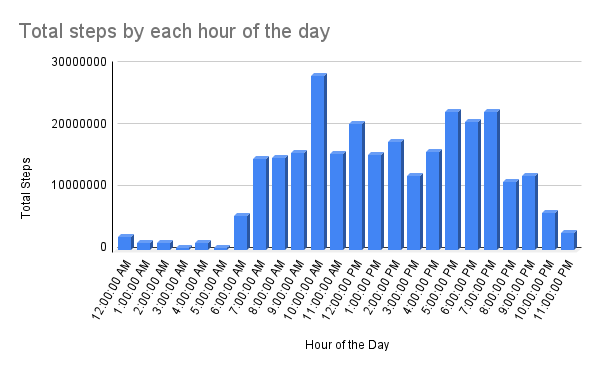

The results showed that there was a consistent amount of activity throughout the day. However, the hours with the most steps throughout the day were: 

* 10:00am - 28212723 steps 
* 12:00pm - 20390436 steps
*  5:00pm - 22410531 steps
*  6:00pm - 20810790 steps
*  7:00pm - 22321233 steps

#### 5.7 Sleep and Calories burned 


Analysis on the Sleep_day_merged datset to look for the MIN, MAX, & AVG time a user spent asleep. Furthermore I wanted to see what was the average time they spent in bed as well.

In [ ]:
-- Analyzing the time users spent in bed --
SELECT 
   AVG(TotalMinutesAsleep)/60 As avg_hours_sleep,
   MIN(TotalMinutesAsleep)/60 AS min_hours_sleep,
   MAX(TotalMinutesAsleep)/60 AS max_hours_sleep,
   AVG(TotalTimeInBed)/60 AS avg_time_Inbed
 FROM `bellabeat-case-study-389920.fitbit_tracker_data.sleep_day_merged`

[View Results Here](https://docs.google.com/spreadsheets/d/1OUcFZaxijkd-MTYONzXoxv2d3gp-kkJLabxeS1cumcU/edit?usp=sharing)

Analysis on the users sleeping patters during the day of the week. 

In [ ]:
  -- Analyzing the total minutes users were asleep for each day --
SELECT 
  SleepDay,
  SUM(TotalMinutesAsleep) AS Total_min_alseep 
FROM `bellabeat-case-study-389920.fitbit_tracker_data.sleep_day_merged`
WHERE SleepDay IS NOT NULL
GROUP BY sleepday

[View Results Here ](https://docs.google.com/spreadsheets/d/1jRD_D1AJTWOtfqqvZ_uNPCF-PvOMI4vi53z9aJjWTrI/edit?usp=sharing)

The analysis aimed to investigate the potential correlation average time asleep and average calories burned. The goal was to determine if individuals who had longer average sleep durations also exhibited higher average calorie burn rates.

In [ ]:
-- Combining the daily activiy dataset and sleep dataset with the JOIN clause--
SELECT a.id,
   avg(a.TotalSteps) as avgTotalSteps,
   avg(a.calories) as avgCalories,
   avg(s.totalminutesasleep) as avgTotalMinutesAsleep,
FROM `bellabeat-case-study-389920.fitbit_tracker_data.dailyActivity` AS a
INNER JOIN `bellabeat-case-study-389920.fitbit_tracker_data.sleep_day_merged`AS s ON a.id=s.Id
GROUP BY a.Id

[View Results Here](https://docs.google.com/spreadsheets/d/1QZ2LQZlVf4cHIR-a7jF8hqdZMtRcSlNWOPbtnsq4JCk/edit?usp=sharing)

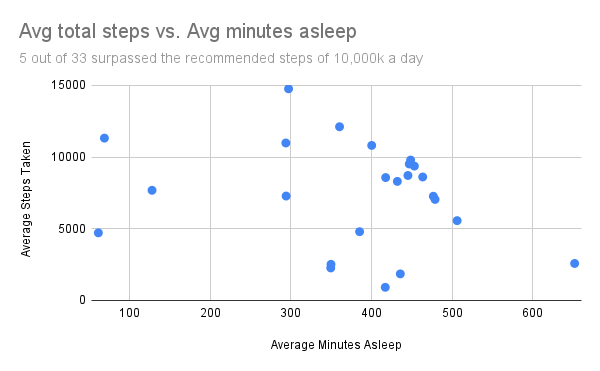

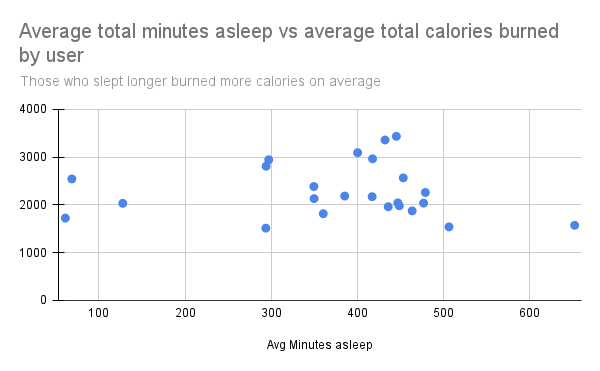

Recommendations
Improve Data Collection
Increase User Sample Size: To gain stronger actionable insights, Bellabeat must  conduct an analysis using a larger, randomized sample size, with specific gender information. The provided sample size does not provide enough information to improve products/services, or make informed decisions. Increase # of User Inputs: Simplify the user information input process (such as weight, height, age, BMI, etc.)  to strengthen the data points used in this analysis. This improved user experience would encourage more users to provide more information, highlighting the value it brings in personalized offerings.
Improve Daily User Experience
Improve Daily Experience: Implement daily reminders within the app or Hardware to encourage users to maintain a healthy charge level, the reminder will help ensure that users have consistent device functionality and engagement. Sending daily notifications to users would  prompt them to "Take a Walk" or "Get Ready for Bed," especially on days where users have no activity. This would support the development of healthy routines and foster positive lifestyle changes. These reminders can assist users in establishing consistent schedules and adopting healthier habits.
Create Goal Recognition: Incorporate personal goals that reward badges, providing incentives for users to maintain consistent schedules and engage with the app regularly. These badges can serve as a form of recognition and motivation, encouraging users to stay committed to their health and wellness journey.

By implementing these recommendations, Bellabeat can enhance user engagement, facilitate healthy lifestyle changes, and provide a more personalized and rewarding experience for their users.

# 6. Act Phase 
#### Conclusion

1. Obtaining significant insights without introducing potential biases is challenging due to the limited sample size of 33 participants and the lack of information regarding their genders and diverse backgrounds, thus highlighting the absence of diverse demographic information.

2. Based on the analysis conducted using the available data, a notable 93.5% were 'Active Users' meaning that they utilized their FitBit device consistently throughout the 31-day period. 

3. The analysis of the users' average activity time revealed that 27 out of the 33 participants successfully achieved the recommended weekly activity of 150 minutes, as suggested by the CDC.

4. Based on research studies, including guidance from the Centers for Disease Control and Prevention (CDC), it is recommended to achieve a daily step count of 10,000 for optimal health. However, in our analysis, the average user falls short of this minimum goal, with only 7 out of the 33 participants managing to reach it.

6. However, Saturday stood out with the highest average steps, followed by the early weekdays (Monday and Tuesday). This pattern indicates a potential trend where users strive to be more active immediately after the weekend, as evidenced by lower step counts on Sunday and moderately lower counts on Friday. Moreover, Saturday presents ample opportunities for increased physical activity and movement.

7. According to the analysis of participants' sleep patterns, individuals who averaged at least 5 hours of sleep tended to burn more calories during the day.


### Recommendations

Improve Data Collection

Increase User Sample Size: To gain stronger actionable insights, Bellabeat must  conduct an analysis using a larger, randomized sample size, with specific gender information. The provided sample size does not provide enough information to improve products/services, or make informed decisions. Increase # of User Inputs: Simplify the user information input process (such as weight, height, age, BMI, etc.) to strengthen the data points used in this analysis. This improved user experience would encourage more users to provide more information, highlighting the value it brings in personalized offerings.


Improve Daily User Experience

Improve Daily Experience: Implement daily reminders within the app or Hardware to encourage users to maintain a healthy charge level, the reminder will help ensure that users have consistent device functionality and engagement. Sending daily notifications to users would  prompt them to "Take a Walk" or "Get Ready for Bed," especially on days where users have no activity. This would support the development of healthy routines and foster positive lifestyle changes. These reminders can assist users in establishing consistent schedules and adopting healthier habits.
Create Goal Recognition: Incorporate personal goals that reward badges, providing incentives for users to maintain consistent schedules and engage with the app regularly. These badges can serve as a form of recognition and motivation, encouraging users to stay committed to their health and wellness journey.

By implementing these recommendations, Bellabeat can enhance user engagement, facilitate healthy lifestyle changes, and provide a more personalized and rewarding experience for their users.
